# Project : To make a system to detect spam and non-spam emails using subject and message body using NLP

In this project we will be bulding a machine learning model for filtering spam emails from the dataset stored in the csv file.
We will be using NLP model because NLP makes it possible for computers to read text, hear speech, interpret it, measure sentiment and determine which parts are important and for the better prediction results we would use SGD classifier for hyperparameter tuning of the model.

In [1]:
#Importing essential libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Uploading csv file for data processing
mail=pd.read_csv("messages.csv")
mail

subject  \
0               job posting - apple-iss research center   
1                                                   NaN   
2     query : letter frequencies for text identifica...   
3                                                  risk   
4                              request book information   
...                                                 ...   
2888                       love your profile - ysuolvpv   
2889                 you have been asked to join kiddin   
2890                 anglicization of composers ' names   
2891  re : 6 . 797 , comparative method : n - ary co...   
2892               re : american - english in australia   

                                                message  label  
0     content - length : 3386 apple-iss research cen...      0  
1     lang classification grimes , joseph e . and ba...      0  
2     i am posting this inquiry for sergei atamas ( ...      0  
3     a colleague and i are researching the differin...      0  
4     earlier this morning i was on the phone with a...      0  
...                                                 ...    ...  
2888  hello thanks for stopping by ! ! we have taken...      1  
2889  the list owner of : " kiddin " has invited you...      1  
2890  judging from the return post , i must have sou...      0  
2891  gotcha ! there are two separate fallacies in t...      0  
2892  hello ! i ' m working on a thesis concerning a...      0  

[2893 rows x 3 columns]

In [3]:
#checking Null values in dataset
mail.isnull().sum()

subject    62
message     0
label       0
dtype: int64

In [4]:
#Filling nan values in subject
mail['subject'].fillna("No Subject",inplace=True)

In [5]:
#checking Null values in dataset again
mail.isnull().sum()

subject    0
message    0
label      0
dtype: int64

In [6]:
#checking count of label
mail.label.value_counts()

0    2412
1     481
Name: label, dtype: int64

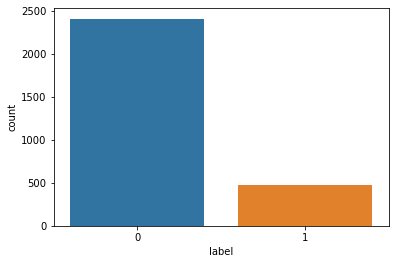

In [7]:
#lets check the values through countplot graph
sns.countplot(x='label',data=mail)
plt.show()

# 1. Data Preparation

In [8]:
#Adding new column for Length of message and subject
mail['Subject_length'] = mail.subject.str.len()
mail['Message_length'] = mail.message.str.len()
mail.head()

subject  \
0            job posting - apple-iss research center   
1                                         No Subject   
2  query : letter frequencies for text identifica...   
3                                               risk   
4                           request book information   

                                             message  label  Subject_length  \
0  content - length : 3386 apple-iss research cen...      0              39   
1  lang classification grimes , joseph e . and ba...      0              10   
2  i am posting this inquiry for sergei atamas ( ...      0              50   
3  a colleague and i are researching the differin...      0               4   
4  earlier this morning i was on the phone with a...      0              24   

   Message_length  
0            2856  
1            1800  
2            1435  
3             324  
4            1046

In [9]:
# Replacing email addresses with 'email'
mail['message'] = mail['message'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')
mail['subject'] = mail['subject'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

# Replace URLs with 'webaddress'
mail['message'] = mail['message'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')
mail['subject'] = mail['subject'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
mail['message'] = mail['message'].str.replace(r'£|\$', 'dollers')
mail['subject'] = mail['subject'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
mail['message'] = mail['message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')
mail['subject'] = mail['subject'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')


# Replace numbers with 'numbr'
mail['message'] = mail['message'].str.replace(r'\d+(\.\d+)?', 'numbr')
mail['subject'] = mail['subject'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [10]:
#checking top five entries of dataset
mail.head()

subject  \
0            job posting - apple-iss research center   
1                                         No Subject   
2  query : letter frequencies for text identifica...   
3                                               risk   
4                           request book information   

                                             message  label  Subject_length  \
0  content - length : numbr apple-iss research ce...      0              39   
1  lang classification grimes , joseph e . and ba...      0              10   
2  i am posting this inquiry for sergei atamas ( ...      0              50   
3  a colleague and i are researching the differin...      0               4   
4  earlier this morning i was on the phone with a...      0              24   

   Message_length  
0            2856  
1            1800  
2            1435  
3             324  
4            1046

In [11]:
#Converting strings to lowercase
mail['message'] = mail['message'].str.lower()
mail['subject'] = mail['subject'].str.lower()

# Remove punctuation
mail['message'] = mail['message'].str.replace(r'[^\w\d\s]', ' ')
mail['subject'] = mail['subject'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
mail['message'] = mail['message'].str.replace(r'\s+', ' ')
mail['subject'] = mail['subject'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
mail['message'] = mail['message'].str.replace(r'^\s+|\s+?$', '')
mail['subject'] = mail['subject'].str.replace(r'^\s+|\s+?$', '')

In [12]:
#checking top five entries of dataset
mail.head()

subject  \
0             job posting apple iss research center   
1                                        no subject   
2  query letter frequencies for text identification   
3                                              risk   
4                          request book information   

                                             message  label  Subject_length  \
0  content length numbr apple iss research center...      0              39   
1  lang classification grimes joseph e and barbar...      0              10   
2  i am posting this inquiry for sergei atamas sa...      0              50   
3  a colleague and i are researching the differin...      0               4   
4  earlier this morning i was on the phone with a...      0              24   

   Message_length  
0            2856  
1            1800  
2            1435  
3             324  
4            1046

In [13]:
#Transforming sentences into words
from nltk.tokenize import RegexpTokenizer
tokenizer=RegexpTokenizer(r'\w+')
mail['message'] = mail['message'].apply(lambda x: tokenizer.tokenize(x.lower()))
mail['subject'] = mail['subject'].apply(lambda x: tokenizer.tokenize(x.lower()))
mail.head()

subject  \
0       [job, posting, apple, iss, research, center]   
1                                      [no, subject]   
2  [query, letter, frequencies, for, text, identi...   
3                                             [risk]   
4                       [request, book, information]   

                                             message  label  Subject_length  \
0  [content, length, numbr, apple, iss, research,...      0              39   
1  [lang, classification, grimes, joseph, e, and,...      0              10   
2  [i, am, posting, this, inquiry, for, sergei, a...      0              50   
3  [a, colleague, and, i, are, researching, the, ...      0               4   
4  [earlier, this, morning, i, was, on, the, phon...      0              24   

   Message_length  
0            2856  
1            1800  
2            1435  
3             324  
4            1046

In [14]:
# Remove stopwords
import string
import nltk
from nltk.corpus import  stopwords

stop_words = set(stopwords.words('english'))
mail['message'] = mail['message'].apply(lambda x:[term for term in x if term not in stop_words])
mail['subject'] = mail['subject'].apply(lambda x:[term for term in x if term not in stop_words])

In [15]:
#Stemming to get root words
from nltk.stem import WordNetLemmatizer
lemma=WordNetLemmatizer()
mail['message'] = mail['message'].apply(lambda x:' '.join(lemma.lemmatize(y) for y in x))
mail['subject'] = mail['subject'].apply(lambda x:' '.join(lemma.lemmatize(y) for y in x))

In [16]:
#Adding new column for Length of  clean message and subject
mail['clean_Subject_length'] = mail.subject.str.len()
mail['clean_Message_length'] = mail.message.str.len()
mail.head()

subject  \
0         job posting apple i research center   
1                                     subject   
2  query letter frequency text identification   
3                                        risk   
4                    request book information   

                                             message  label  Subject_length  \
0  content length numbr apple i research center u...      0              39   
1  lang classification grime joseph e barbara f g...      0              10   
2  posting inquiry sergei atamas satamas umabnet ...      0              50   
3  colleague researching differing degree risk pe...      0               4   
4  earlier morning phone friend mine living south...      0              24   

   Message_length  clean_Subject_length  clean_Message_length  
0            2856                    35                  2143  
1            1800                     7                  1422  
2            1435                    42                  1044  
3             324                     4                   207  
4            1046                    24                   628

In [17]:
# Total length removal
print ('Original Length of message', mail.Message_length.sum())
print ('Clean Length of message', mail.clean_Message_length.sum())
print ('Original Length of subject', mail.Subject_length.sum())
print ('Clean Length of subject', mail.clean_Subject_length.sum())

Original Length of message 9344743
Clean Length of message 6666340
Original Length of subject 92283
Clean Length of subject 77527


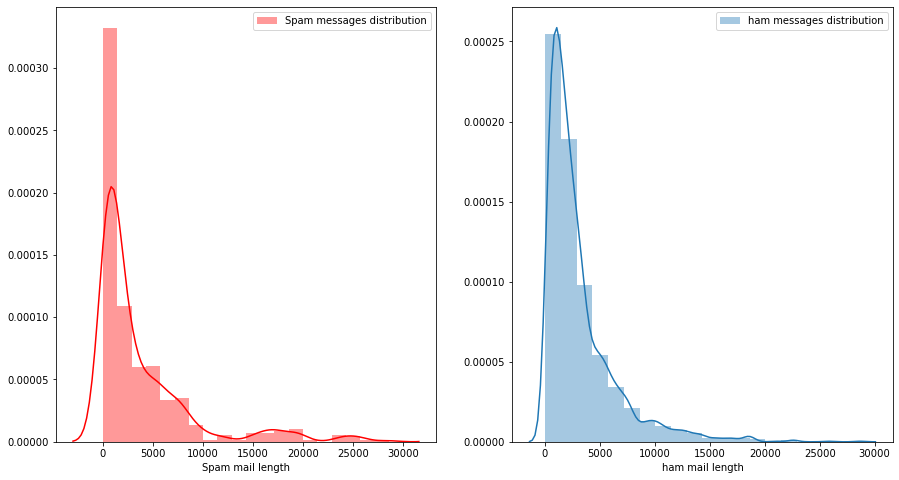

In [18]:
# Message distribution BEFORE cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(mail[mail['label']==1]['Message_length'],bins=20,ax=ax[0],label='Spam messages distribution',color='r')

ax[0].set_xlabel('Spam mail length')
ax[0].legend()

sns.distplot(mail[mail['label']==0]['Message_length'],bins=20,ax=ax[1],label='ham messages distribution')
ax[1].set_xlabel('ham mail length')
ax[1].legend()

plt.show()

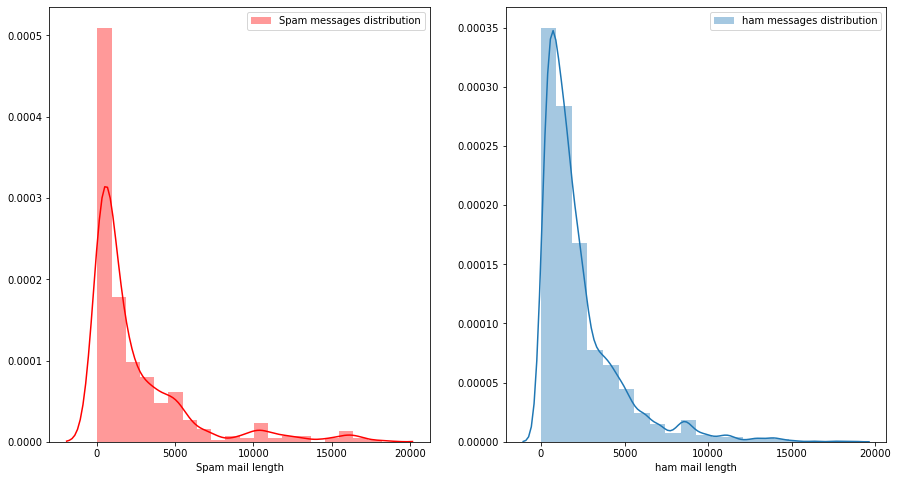

In [19]:
# Message distribution AFTER cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(mail[mail['label']==1]['clean_Message_length'],bins=20,ax=ax[0],label='Spam messages distribution',color='r')
ax[0].set_xlabel('Spam mail length')
ax[0].legend()

sns.distplot(mail[mail['label']==0]['clean_Message_length'],bins=20,ax=ax[1],label='ham messages distribution')
ax[1].set_xlabel('ham mail length')
ax[1].legend()

plt.show()

In [20]:
# Subject distribution BEFORE cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(mail[mail['label']==1]['Subject_length'],bins=20,ax=ax[0],label='Spam Subject distribution',color='r')

ax[0].set_xlabel('Spam subject length')
ax[0].legend()

sns.distplot(mail[mail['label']==0]['Subject_length'],bins=20,ax=ax[1],label='ham subject distribution')
ax[1].set_xlabel('ham subject length')
ax[1].legend()

plt.show()

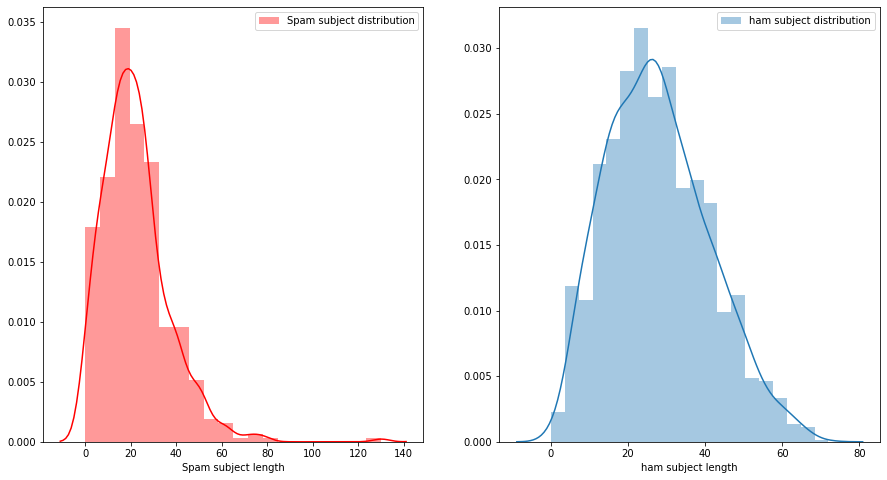

In [21]:
# Subject distribution AFTER cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(mail[mail['label']==1]['clean_Subject_length'],bins=20,ax=ax[0],label='Spam subject distribution',color='r')
ax[0].set_xlabel('Spam subject length')
ax[0].legend()

sns.distplot(mail[mail['label']==0]['clean_Subject_length'],bins=20,ax=ax[1],label='ham subject distribution')
ax[1].set_xlabel('ham subject length')
ax[1].legend()

plt.show()

# 2. Building Word Dictionay

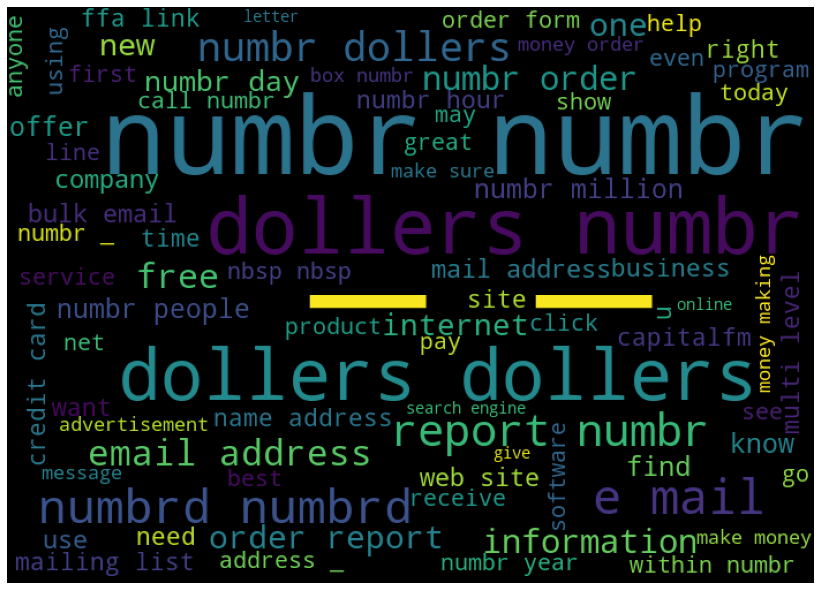

In [22]:
#Getting sense of loud words for spam mails in message
from wordcloud import WordCloud


spam = mail['message'][mail['label']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='black',max_words=80).generate(' '.join(spam))

plt.figure(figsize=(12,8))
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [23]:
#Getting sense of loud words for spam mails in subject
from wordcloud import WordCloud


spam = mail['subject'][mail['label']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='black',max_words=80).generate(' '.join(spam))

plt.figure(figsize=(12,8))
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [24]:
#Getting sense of loud words for ham mails in message
from wordcloud import WordCloud


ham = mail['message'][mail['label']==0]

ham_cloud = WordCloud(width=700,height=500,background_color='black',max_words=80).generate(' '.join(ham))

plt.figure(figsize=(12,8))
plt.imshow(ham_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [25]:
#Getting sense of loud words for ham mails in subject
from wordcloud import WordCloud


ham = mail['subject'][mail['label']==0]

ham_cloud = WordCloud(width=700,height=500,background_color='black',max_words=80).generate(' '.join(ham))

plt.figure(figsize=(12,8))
plt.imshow(ham_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# 3. Feature Extraction

In [26]:
# Convert text into vectors using TF-IDF
# Split feature and label
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

tf_vec = TfidfVectorizer()

mail["complete_string"] = mail["subject"] + mail["message"]

features = tf_vec.fit_transform(mail["complete_string"])


# 4. Training & Testing

In [27]:
x = features
y = mail['label']

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42)

In [29]:
from sklearn.metrics import confusion_matrix,classification_report,auc,roc_curve,roc_auc_score,precision_score,f1_score,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.model_selection import cross_val_score

In [30]:
KNN=KNeighborsClassifier()
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier()
GNB=MultinomialNB()
RFC=RandomForestClassifier()
GBC=GradientBoostingClassifier()
ABC=AdaBoostClassifier()
ETC=ExtraTreesClassifier()

In [31]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DT))
models.append(('MultinomialNB', GNB))
models.append(('RandomForestClassifier', RFC))
models.append(('GradientBoostingClassifier', GBC))
models.append(('ExtraTreesClassifier',ETC))
models.append(('AdaBoostClassifier',ABC))

*********************** KNeighborsClassifier ***********************


KNeighborsClassifier()


Accuracy_score =  0.9696132596685083


Cross_Val_Score =  0.9599009664717814


roc_auc_score =  0.9565147881694643


classification_report
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       585
           1       0.91      0.94      0.92       139

    accuracy                           0.97       724
   macro avg       0.95      0.96      0.95       724
weighted avg       0.97      0.97      0.97       724



[[572  13]
 [  9 130]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*********************** SVC ***********************


SVC()


Accuracy_score =  0.9737569060773481


Cross_Val_Score =  0.9740758859324663


roc_auc_score =  0.9343970977064502


classification_report
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       585
           1       0.99      0.87      0.93       139

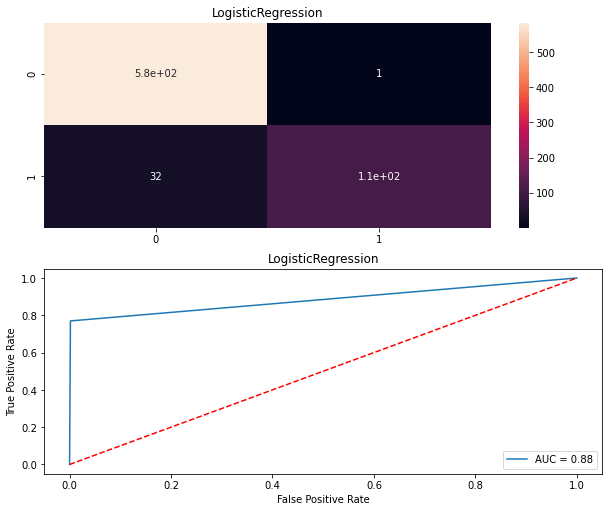

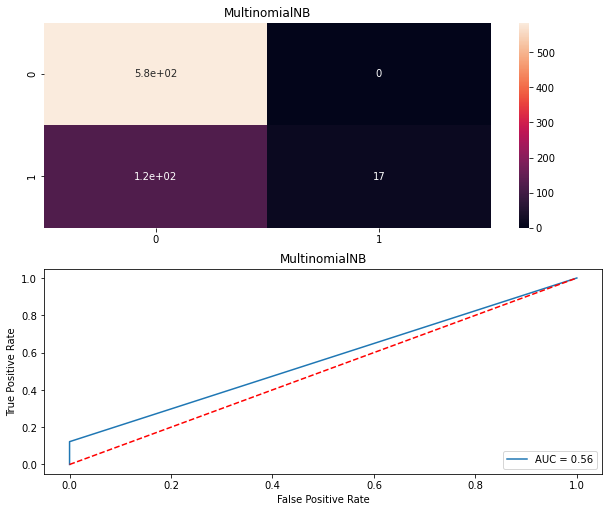

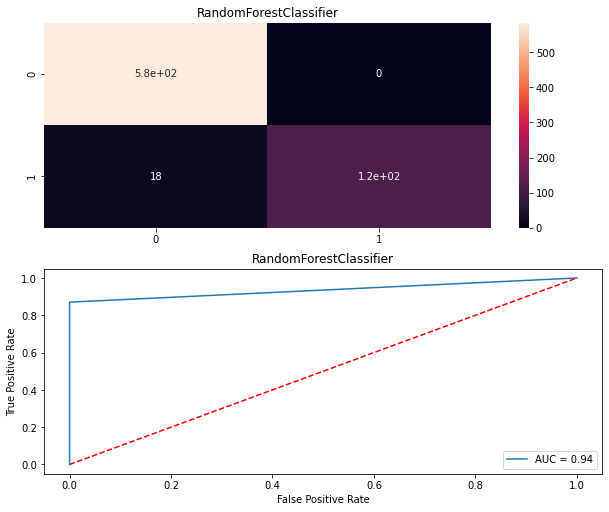

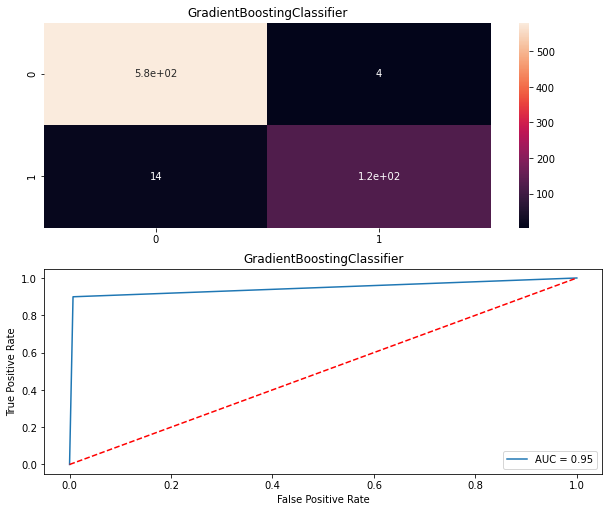

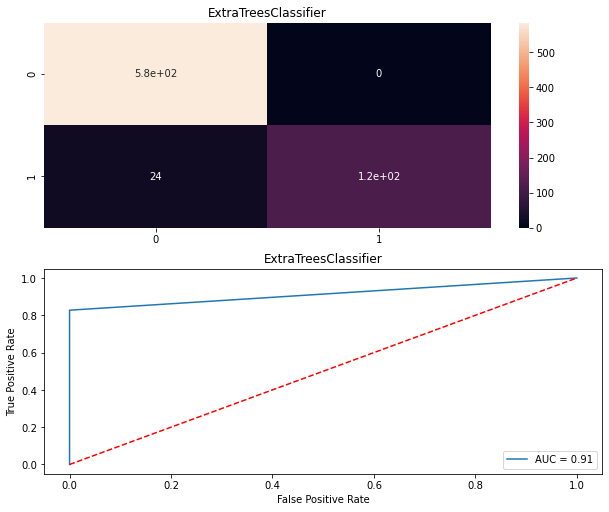

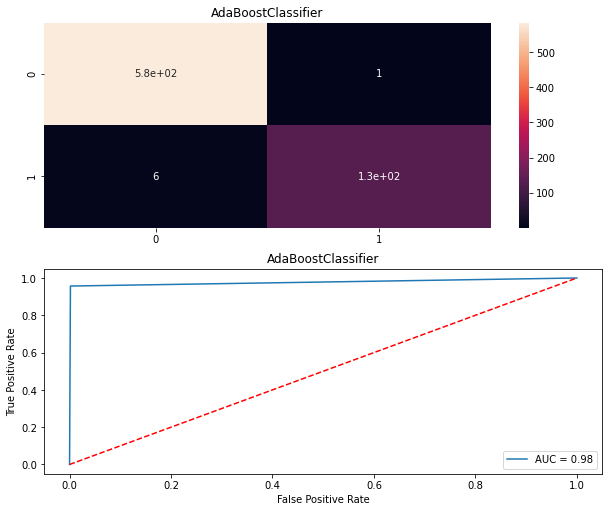

In [32]:
Model = []
score = []
cvs=[]
rocscore=[]
for name,model in models:
    print('***********************',name,'***********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print ('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

# 5. Performance evaluation using multiple metrics 

In [33]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score ,'Cross_val_score':cvs,'Roc_auc_curve':rocscore})
result

Model  Accuracy_score  Cross_val_score  Roc_auc_curve
0        KNeighborsClassifier       96.961326        95.990097      95.651479
1                         SVC       97.375691        97.407589      93.439710
2          LogisticRegression       95.441989        95.713161      88.403739
3      DecisionTreeClassifier       95.718232        94.987472      92.139827
4               MultinomialNB       83.149171        85.758263      56.115108
5      RandomForestClassifier       97.513812        97.303782      93.525180
6  GradientBoostingClassifier       97.513812        97.304021      94.622148
7        ExtraTreesClassifier       96.685083        96.785348      91.366906
8          AdaBoostClassifier       99.033149        98.720797      97.756257

# 6. Conclusion